In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import linear,sigmoid,relu
plt.style.use('./deeplearning.mplstyle')
tf.autograph.set_verbosity(0)

from public_tests import *

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision = 2)

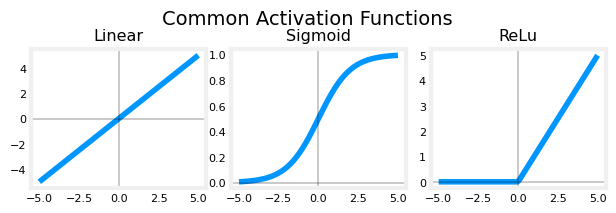

In [5]:
plt_act_trio()


In [6]:
def my_softmax(z):
  ac = np.exp(z)
  a = ac/np.sum(ac)
  return a

In [9]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
test_my_softmax(my_softmax)


 All tests passed.


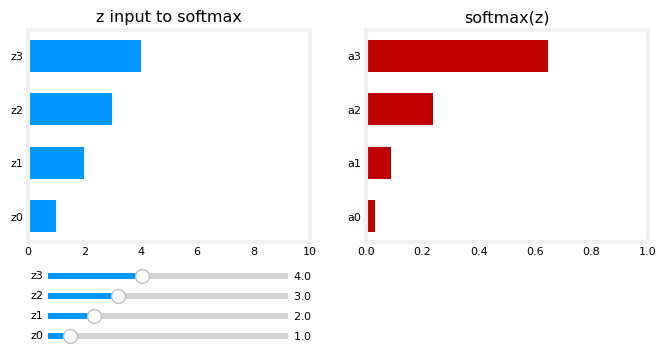

In [10]:
plt.close("all")
plt_softmax(my_softmax)

In [14]:
def load_data():
    X = np.load("X.npy")
    y = np.load("y.npy")
    return X, y


In [17]:
X,y = load_data()

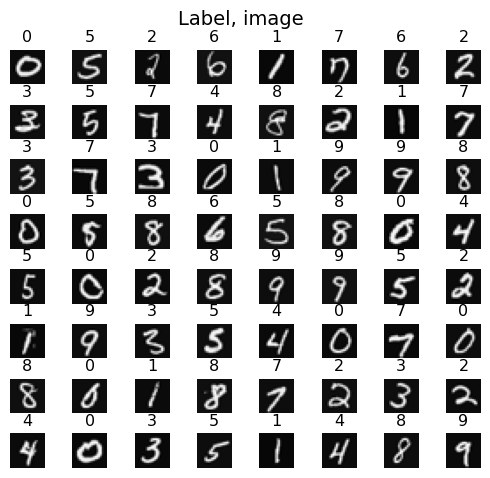

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [32]:
tf.random.set_seed(1234) # for consistent results

model = Sequential(
    [
        tf.keras.layers.InputLayer((400,)),
        Dense(25,activation = 'relu', name = "L1"),
        Dense(15,activation = 'relu', name = "L2"),
        Dense(10,activation = 'linear', name = "L3"),
    ], name = "my_model"
)

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001)
)

In [33]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# BEGIN UNIT TEST
test_model(model, 10, 400)


All tests passed!


In [35]:
history =model.fit(
    X,y,
    epochs = 40
)

Epoch 1/40
157/157 [==============================] - 1s 2ms/step - loss: 1.5980
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.6769
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.4488
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3594
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3114
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2778
Epoch 7/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2466
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2250
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2089
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1867
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1749
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1614
Epoch 13/40
157/157 [====

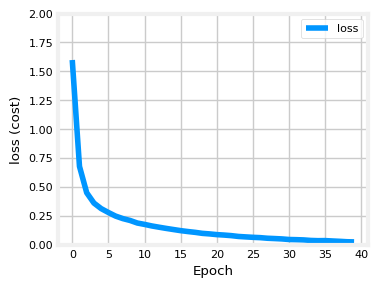

In [36]:
plot_loss_tf(history)


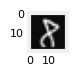

1/1 [==============================] - 0s 23ms/step
8


In [43]:
image_of_two = X[4116]
display_digit(image_of_two)
prediction = model.predict(image_of_two.reshape(1,400))  # prediction
print(np.argmax(prediction))

1/1 [==============================] - 0s 23ms/step


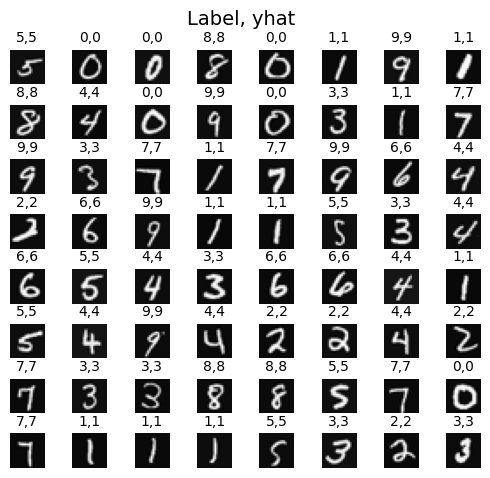

In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

1/1 [==============================] - 0s 19ms/step
11 errors out of 5000 images


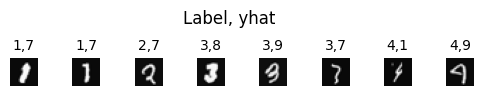

In [47]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")